solar power predection using machine learning
---Objective: Predict solar power output based on weather data.

STEP 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

STEP 3: Load Dataset

In [5]:
data = pd.read_csv(r"C:\Users\soujanya\OneDrive\Desktop\solar power\SolarPrediction dataset.csv")
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


STEP 4: Basic Data Understanding

In [6]:
data.shape

(32686, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


STEP 5: Check Missing Values

In [10]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

if missing values exist:

In [11]:
data = data.dropna()

step 6: Feature Selection

Now decide:
X = Input features (weather data)
y = Target (solar power)

In [14]:
X = data[['Temperature', 'Humidity', 'Speed']]
y = data['Radiation']

STEP 7: Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

STEP 8: Create Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

step 9: Train Model

In [22]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

step 10: Make Predictions

In [23]:
y_pred = model.predict(X_test)

step 11: Evaluate Model

In [24]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 117.69338471003151
MSE: 39778.037183900415
RMSE: 199.4443210119065
R2 Score: 0.5996042377755243


step 12: Visualization

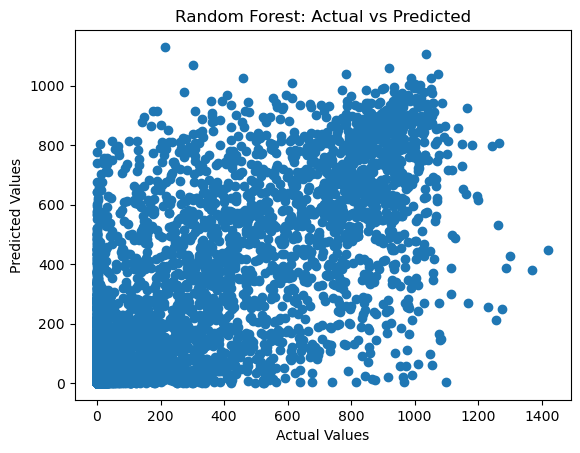

In [25]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

To Improve Your R² Score

In [ ]:
Use More Features:

In [26]:
"UNIXTime"

'UNIXTime'

Try More Trees:

In [30]:

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

Use Hyperparameter Tuning:

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
# 1. Import
from sklearn.ensemble import RandomForestRegressor

# 2. Create Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Train Model
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

Check Feature Importance:

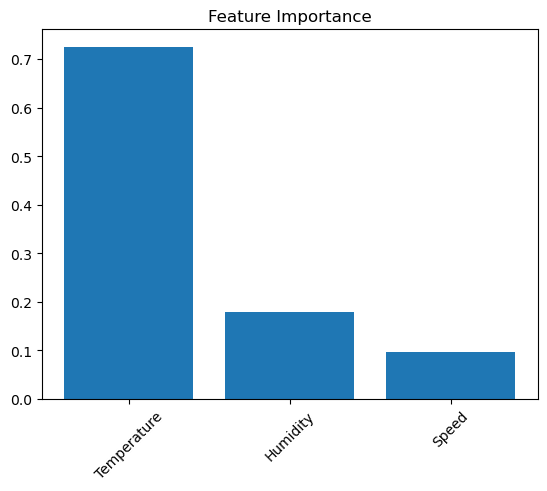

In [34]:
import matplotlib.pyplot as plt

importance = model.feature_importances_

plt.figure()
plt.bar(X.columns, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()